<div style="background-color: #008B8B; padding: 15px; border-radius: 5px; font-size: 38px; color: black; font-weight: bold;">
Latent Neural SDE VAE
</div>

<div style="background-color: #008B8B; padding: 15px; border-radius: 5px; font-size: 20px; color: black; font-weight: bold;">
Biblio
</div>

Neural ODEs:

**Neural ODEs (https://arxiv.org/abs/1806.07366) (2019)** : introduction of the Neural ODE as the continuous-time limit of a ResNet stack. Presentation of the use of the adjoint sensitivity method. Seminal paper for Neural ODE.

**Latent ODEs for Irregularly-Sampled Time Series (https://arxiv.org/abs/1907.03907) (2019)** : Evolution of the Neural ODE model towards a Neural ODE RNN model, where the approximate posterior is built with a RNN on past observations.

Neural SDEs:

**SDE Matching: Scalable and Simulation-Free Training of Latent Stochastic Differential Equations (https://arxiv.org/abs/2502.02472 , 2025)** : good background section (#2) to explain Neural SDE. Propose a new method SDE matching, inspired by score and flow matching, vs the adjoint sensivity method. SDE matching is claimed to be more efficient to compute gradients and train latent SDEs.

**Scalable Gradients for Stochastic Differential Equations (https://arxiv.org/abs/2001.01328) (2020)** : generalization of the adjoint sensitivity method to SDEs. Combination with gradient-based stochastic variational inference for infinite-dimension VAEs.

**Neural SDEs (https://www.researchgate.net/publication/333418188_Neural_Stochastic_Differential_Equations) (2019)** : link between infinitely deep residual networks and solutions to stochastic differential equations

**Stable Neural SDEs in analyzing irregular time series data (https://arxiv.org/abs/2402.14989) (2025)** : points to the necessity of careful design of the drift and diffusion neural nets in latent SDEs. Introduces three latent SDEs models with performance guarantees.

**Generative Modeling of Neural Dynamics via Latent Stochastic Differential Equations (https://arxiv.org/abs/2412.12112) (2024)** : application of neural SDEs to a biological use case (brain activity). Details the model, architecture, ELBO/loss computation. Takes into account inputs/commands in the model. 

General/Misc:

**Efﬁcient gradient computation for dynamical models (https://www.fil.ion.ucl.ac.uk/~wpenny/publications/efficient_revised.pdf) (2014)** : summary of finite difference method, forward sensitivity method, adjoint sensitivity method, to compute gradients of a functional cost function. Applies to Neural ODEs training.

**Cyclical Annealing Schedule: A Simple Approach to Mitigating KL Vanishing (https://arxiv.org/abs/1903.10145) (2019)** : explanation of the posterior collapse/KL vanishing problem, introduces different KL annealing schedules for VAE training.


<div style="background-color: #008B8B; padding: 15px; border-radius: 5px; font-size: 20px; color: black; font-weight: bold;">
Code : torchsde library by Google Research
</div>

https://github.com/google-research/torchsde

[1] Xuechen Li, Ting-Kam Leonard Wong, Ricky T. Q. Chen, David Duvenaud. "Scalable Gradients for Stochastic Differential Equations". International Conference on Artificial Intelligence and Statistics. 2020. [arXiv]

[2] Patrick Kidger, James Foster, Xuechen Li, Harald Oberhauser, Terry Lyons. "Neural SDEs as Infinite-Dimensional GANs". International Conference on Machine Learning 2021. [arXiv]

[3] Patrick Kidger, James Foster, Xuechen Li, Terry Lyons. "Efficient and Accurate Gradients for Neural SDEs". 2021. [arXiv]

[4] Patrick Kidger, James Morrill, James Foster, Terry Lyons, "Neural Controlled Differential Equations for Irregular Time Series". Neural Information Processing Systems 2020. [arXiv]



<div style="background-color: #008B8B; padding: 15px; border-radius: 5px; font-size: 20px; color: black; font-weight: bold;">
Model & Math
</div>

Data : $\mathbf{X} = (x_{t_1}, x_{t_2}, ..., x_{t_N}) \in \mathbb{R}^{D_x}$ - assuming all $t_i \in [0,1]$.

The latent space has dimension $D_z$. The latent continuous dynamic is $\mathbf{Z}$ defined by:
\begin{align*}
z_0^{(\theta)} &\sim p_{\theta_z}(z_0) \\
dz_t^{(\theta)} &= f_{\theta}(z_t, t)dt + \sigma_{\theta}(z_t,t)dB_t 
\end{align*}
with: 
\begin{align}
\textbf{drift} \,& f_{\theta} : \mathbb{R}^{D_z} \times [0,1] \rightarrow \mathbb{R}^{D_z} \\
\textbf{diffusion} \,& \sigma_{\theta} : \mathbb{R}^{D_z} \times [0,1] \rightarrow \mathbb{R}^{D_z \times D_z} \\
\textbf{Brownian motion} \,& dB_t \in \mathbb{R}^{D_z}
\end{align}

The decoder is classically:
\begin{align}
p_{\theta_x}(x_{t_i} \vert z_{t_i})
\end{align}

The approximate posterior (encoder) is also a SDE:
\begin{align}
z_0^{(\phi)} &\sim q_{\phi}(z_0 \vert \textbf{X}) \\
dz_t^{(\phi)} &= f_{\phi}(z_t, t, \textbf{X})dt + \sigma_{\theta}(z_t,t)dB_t 
\end{align}

where:
- the drift $f_{\phi}(z_t, t, \textbf{X})$ is conditionned on observations $\textbf{X}$
- the diffusion of the approximate posterior is shared with the diffusion of the prior : $\sigma_{\theta}(z_t,t)$ - this ensures the application of Girsanov theorem and a finite KL divergence between the two stochastic processes (prior and approximate posterior) (see Generative Modeling of Neural Dynamics via Latent Stochastic Differential Equations (https://arxiv.org/abs/2412.12112) (2024))
- drift and diffusion neural nets do not exhibit the same convergence guarantee (Stable Neural SDEs in analyzing irregular time series data (https://arxiv.org/abs/2402.14989) (2025))
- non-diagonal diffusion seems to be difficult to simulate and costly to approximate (Scalable Gradients for Stochastic Differential Equations (https://arxiv.org/abs/2001.01328) (2020))
- it seems a good practice to encode only part of the $\textbf{X}$ in the approximate posterior : context vector (Scalable Gradients for Stochastic Differential Equations (https://arxiv.org/abs/2001.01328) (2020)), and $t_c << t_n$ in Generative Modeling of Neural Dynamics via Latent Stochastic Differential Equations (https://arxiv.org/abs/2412.12112) (2024).

Variational lower bound on the log marginal likelihood:

We write:
\begin{align}
p(x_{t_1:t_N}) &= \frac{p(x_{t_1:t_N}, z_{t_1:t_N})}{p(z_{t_1:t_N} \vert x_{t_1:t_N})}
\end{align}
And:
\begin{align}
\log{p(x_{t_1:t_N})} &= \int q_{\phi}(z \vert X) \log{\frac{p(x_{t_1:t_N}, z_{t_1:t_N})}{q_{\phi}(z\vert X)}\frac{q_{\phi}(z\vert X)}{p(z_{t_1:t_N} \vert x_{t_1:t_N})}} dz
\end{align}
where $q_{\phi}(z \vert X)$ is formally is posterior distribution over **functions** $z : \mathbb{R} \rightarrow \mathbb{R}^{D_z}$.
Then:
\begin{align}
\log{p(x_{t_1:t_N})} &= \int q_{\phi}(z \vert X) \log{\frac{p(x_{t_1:t_N}, z_{t_1:t_N})}{q_{\phi}(z\vert X)}} dz + \mathbb{KL}(q_{\phi}(z\vert X) \vert\vert p(z_{t_1:t_N} \vert x_{t_1:t_N}))
\end{align}
where we -audaciously- consider $p(z_{t_1:t_N} \vert x_{t_1:t_N})$ as a dsitribution over functions $z$ taking values $z_{t_1:t_N}$ at times $t_1:t_N$ so the $\mathbb{KL}$ actually means something.
Still on the same path:
\begin{align}
\log{p(x_{t_1:t_N})} &\geq \int q_{\phi}(z \vert X) \log{\frac{p(x_{t_1:t_N}, z_{t_1:t_N})}{q_{\phi}(z\vert X)}} dz \\
&= \int q_{\phi}(z \vert X) \log{\frac{p(x_{t_1:t_N} \vert z_{t_1:t_N})}{q_{\phi}(z\vert X)} p(z_{t_1:t_N})} dz \\
&= \mathbb{E}_{q_{\phi}(z \vert X)} \log{p(x_{t_1:t_N} \vert z_{t_1:t_N})} - \mathbb{KL}(q_{\phi}(z\vert X) \vert\vert p(z_{t_1:t_N})) \\
\end{align}
We write -still audaciously-
\begin{align}
\mathbb{KL}(q_{\phi}(z\vert X) \vert\vert p(z_{t_1:t_N})) &= \mathbb{KL}(q_{\phi}(z_0\vert X) \vert\vert p_{\theta_z}(z_0)) + \mathbb{KL}(q_{\phi}(z_{>0}\vert X) \vert\vert p_{\theta_z}(z_{>0}))
\end{align}
where the first $\mathbb{KL}$ on the r.h.s is a classic between two probability distributions over a random variable, and the second is derived from the Girsanov's theorem as:
\begin{align}
\mathbb{KL}(q_{\phi}(z_{>0}\vert X) \vert\vert p_{\theta_z}(z_{>0})) &= \frac{1}{2} \mathbb{E}_{q_{\phi}(z_{>0}\vert X)} \left( \int_{0}^{T} \vert \Delta(t) \vert^2 dt \right) \\
\Delta(t) &= \sigma_{\theta}^{-1}(z_t,t) (f_{\phi}(z_t, t, \textbf{X}) - f_{\theta}(z_t, t))
\end{align}

Finally:
\begin{align}
\mathcal{L}(\theta, \phi, \textbf{X}) &= \mathbb{E}_{q_{\phi}(z \vert X)} \log{p(x_{t_1:t_N} \vert z_{t_1:t_N})} - \mathbb{KL}(q_{\phi}(z_0\vert X) \vert\vert p_{\theta_z}(z_0)) - \frac{1}{2} \mathbb{E}_{q_{\phi}(z_{>0}\vert X)} \left( \int_{0}^{T} \vert \Delta(t) \vert^2 dt \right)
\end{align}

During training:
- the integral is approximated via numerical integration
- expectations are estimated with MC sampling
- NB : sampling is actually : sampling $z_0 \sim q_{\phi}(z_0 \vert \textbf{X})$ and sampling a function $z$ by sampling a Brownian motion path $B_t$ and computing the whole realization path $z_t$.

<div style="background-color: #008B8B; padding: 15px; border-radius: 5px; font-size: 20px; color: black; font-weight: bold;">
Set Up
</div>

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torchsde
# from torchdiffeq import odeint, odeint_adjoint

# from mpl_toolkits.mplot3d import Axes3D
import timeit
from tqdm import tqdm

In [37]:
def seed_everything(seed=42):
    """
    Set seed for reproducibility.
    """
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)  # if you are using multi-GPU.
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    
seed_everything()

In [38]:
if torch.cuda.is_available():
    device = torch.device('cuda')
    dtype = torch.cuda.FloatTensor
else:
    device = torch.device('cpu')
    dtype = torch.FloatTensor

print(f"Using {device}")

torch.set_default_dtype(torch.float32)

if device.type == 'cuda':
    print('GPU Name:', torch.cuda.get_device_name(0))
    print('Total GPU Memory:', round(torch.cuda.get_device_properties(0).total_memory/1024**3,1), 'GB')

Using cuda
GPU Name: NVIDIA GeForce RTX 3080 Ti
Total GPU Memory: 11.8 GB


<div style="background-color: #008B8B; padding: 15px; border-radius: 5px; font-size: 20px; color: black; font-weight: bold;">
Data and Problem Statement
</div>

- The experiment is an unknown stochastic process $dX_t = f(X_t,t)dt + \sigma(X_t,t)dB_t$
- We observe several sample paths of this stochastic process.
- Each sample path is a collection $\{ (t_1, x_{t_1}), (t_2, x_{t_2}), ..., (t_n, x_{t_n}) \}$ of $n$ data points at observation times $(t_i)_{1 \leq i \leq n}$. NB : $n$ may vary by sample.

In [39]:
B = 1 # batch size, ie number of sample paths
LENGTH = 100 # total number of points used to draw a full path of the stochastic process
N_POINTS = 90 # total number of points that are actually observed in the stochastic process

Data Generating SDE

In [40]:
# here, we create an Ornstein Uhlenbeck SDE model:
# dX_t = theta * (mu - X_t) dt + sigma dB_t
# theta, mu, sigma scalar parameters
# B_t is a standard 1D Brownian motion

# SDE are instantiated as subclasses of nn.Module

class DataGeneratingSDE(nn.Module):
    def __init__(self, theta, mu, sigma):
        
        # noise type can take 4 values : "diagonal", "general", "additive", "scalar"
        # here we use "diagonal" : the diffusion function g(t,y) is an element wise function,
        # its output has the same shape as y, ie (batch_size, state_size)
        
        # sde_type can be "ito" or "stratonovich"
        # we use "ito" here. The available methods for computation are Euler(-Maruyama), Milstein, SRK.
        super().__init__()
        self.noise_type = "diagonal"
        self.sde_type = "ito"
        
        # we register the parameters so we can save them. But we will not train them.
        self.register_buffer("theta", torch.tensor(theta))
        self.register_buffer("mu", torch.tensor(mu))
        self.register_buffer("sigma", torch.tensor(sigma))

    # DRIFT FUNCTION
    # inputs are:
    # - t : a tensor of shape (1,) representing the time stamps
    # - y : a tensor of shape (batch_size, state_size) representing the current state
    # outputs:
    # - a tensor of shape (batch_size, state_size) representing the drift at time t and state y
    # note : the functions f and g must be able to handle inputs of shape (batch_size, state_size)
    # for any batch_size >= 1
    def f(self, t, y):
        return self.theta * (self.mu - y)
    
    # DIFFUSION FUNCTION
    # inputs are:
    # - t : a tensor of shape (1,) representing the time stamps
    # - y : a tensor of shape (batch_size, state_size) representing the current state
    # outputs:
    # - a tensor of shape (batch_size, state_size) representing the diffusion at time t and state y
    # (NB : generally, the output of g is of shape (batch_size, state_size, brownian_size) when noise_type is "general")
    def g(self, t, y):
        return self.sigma * torch.ones_like(y)
    
    def __repr__(self):
        msg = f"Ornstein Uhlenbeck SDE Model - mu = {self.mu:.3f}, theta = {self.theta:.3f}, sigma = {self.sigma:.3f}"
        return msg

In [41]:
# instantiate model
theta = torch.distributions.Uniform(0.1, 1.0).rsample()
mu = torch.distributions.Uniform(-1.0, 1.0).rsample()
sigma = torch.distributions.Uniform(0.01, 1.0).rsample()
datamodel = DataGeneratingSDE(theta=theta.item(), mu=mu.item(), sigma=sigma.item()).to(device)

print(f"Data Generating Model : {datamodel}")

Data Generating Model : Ornstein Uhlenbeck SDE Model - mu = 0.830, theta = 0.894, sigma = 0.389


In [42]:
# form dataset

# times
t_start = 0.0
t_end = 10.0
times = torch.linspace(t_start, t_end, LENGTH).to(device) # (LENGTH)
all_times = times.repeat(B,1) # (B, LENGTH)
       
print(f"All times for data generation : {all_times.shape} (batch, length)")

All times for data generation : torch.Size([1, 100]) (batch, length)


In [43]:
times

tensor([ 0.0000,  0.1010,  0.2020,  0.3030,  0.4040,  0.5051,  0.6061,  0.7071,
         0.8081,  0.9091,  1.0101,  1.1111,  1.2121,  1.3131,  1.4141,  1.5152,
         1.6162,  1.7172,  1.8182,  1.9192,  2.0202,  2.1212,  2.2222,  2.3232,
         2.4242,  2.5253,  2.6263,  2.7273,  2.8283,  2.9293,  3.0303,  3.1313,
         3.2323,  3.3333,  3.4343,  3.5354,  3.6364,  3.7374,  3.8384,  3.9394,
         4.0404,  4.1414,  4.2424,  4.3434,  4.4444,  4.5455,  4.6465,  4.7475,
         4.8485,  4.9495,  5.0505,  5.1515,  5.2525,  5.3535,  5.4545,  5.5556,
         5.6566,  5.7576,  5.8586,  5.9596,  6.0606,  6.1616,  6.2626,  6.3636,
         6.4646,  6.5657,  6.6667,  6.7677,  6.8687,  6.9697,  7.0707,  7.1717,
         7.2727,  7.3737,  7.4747,  7.5758,  7.6768,  7.7778,  7.8788,  7.9798,
         8.0808,  8.1818,  8.2828,  8.3838,  8.4848,  8.5859,  8.6869,  8.7879,
         8.8889,  8.9899,  9.0909,  9.1919,  9.2929,  9.3939,  9.4949,  9.5960,
         9.6970,  9.7980,  9.8990, 10.00

In [44]:
# data
Dx = 1 # dimension - 1 as it is a univariate time serie

# sampling full data paths
y_start = 0.0
y0s = torch.full((B,1),y_start).to(device)

with torch.no_grad():
    all_data = torchsde.sdeint(datamodel, y0s, times, method='euler', dt=1e-3) # (N_POINTS,B,1)
    
all_data = all_data.permute(1,0,2) # (B,N_POINTS,1)
# print(f"Computed full sample paths : {all_data.shape} (length,batch,1)")

# extract some subsets in each sample path
for b in range(B):
    idx = np.random.choice(np.arange(LENGTH), N_POINTS, replace=False)  # indices to pick
    idx = np.sort(idx) # sort them to have increasing times
    observation_ts = times[idx] # (N_POINTS) 
    sampled_d = all_data[b,idx] # (N_POINTS,1)
    if b==0:
        sampled_data = sampled_d.detach().unsqueeze(0)
        observation_times = observation_ts.detach().unsqueeze(0)
    else:
        sampled_data = torch.cat([sampled_data, sampled_d.detach().unsqueeze(0)], dim=0)
        observation_times = torch.cat([observation_times, observation_ts.detach().unsqueeze(0)], dim=0) # (B,N_POINTS)

# print(f"Observations times : {observation_times.shape}")
# print(f"Sampled data : {sampled_data.shape}")

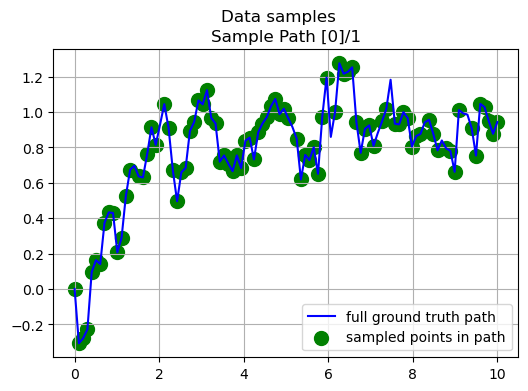

In [45]:
N_DISPLAY=min(B,5)

fig, ax = plt.subplots(nrows=1, ncols=N_DISPLAY, figsize=(6*N_DISPLAY,4))
idx = np.random.choice(np.arange(B),N_DISPLAY,replace=False)
if N_DISPLAY >= 2:
    for i,id in enumerate(idx):
        ax[i].plot(all_times[id].squeeze().detach().cpu().numpy(), all_data[id,:].squeeze().detach().cpu().numpy(), label='full ground truth path', color='blue')
        ax[i].scatter(observation_times[id].squeeze().detach().cpu().numpy(), sampled_data[id].squeeze().detach().cpu().numpy(), s=100, label='sampled points in path', color='green', marker='o')
        ax[i].legend()
        ax[i].grid()
        ax[i].set_title(f'Sample Path {id}/{B}')
else:
    id = idx
    ax.plot(all_times[id].squeeze().detach().cpu().numpy(), all_data[id,:].squeeze().detach().cpu().numpy(), label='full ground truth path', color='blue')
    ax.scatter(observation_times[id].squeeze().detach().cpu().numpy(), sampled_data[id].squeeze().detach().cpu().numpy(), s=100, label='sampled points in path', color='green', marker='o')
    ax.legend()
    ax.grid()
    ax.set_title(f'Sample Path {id}/{B}')
    
fig.suptitle(f'Data samples')
plt.show()

In [46]:
print(f"DATA GENERATING MODEL")
print(datamodel)
print()
print(f"DATA SUMMARY")
print()
print(f"LENGTH of full sample path : {LENGTH}")
print(f"BATCH of paths : {B}")
print(f"Number of points N_POINTS observed in each path : {N_POINTS}")
print()
print(f"Tensor of full paths : {all_data.shape} (BATCH,LENGTH,1)")
print(f"Tensor of all times : {all_times.shape} (BATCH,LENGTH)")
print()
print(f"Tensor of sampled paths : {sampled_data.shape} (BATCH,N_POINTS,1)")
print(f"Tensor of sampling times : {observation_times.shape} (BATCH,N_POINTS)")

DATA GENERATING MODEL
Ornstein Uhlenbeck SDE Model - mu = 0.830, theta = 0.894, sigma = 0.389

DATA SUMMARY

LENGTH of full sample path : 100
BATCH of paths : 1
Number of points N_POINTS observed in each path : 90

Tensor of full paths : torch.Size([1, 100, 1]) (BATCH,LENGTH,1)
Tensor of all times : torch.Size([1, 100]) (BATCH,LENGTH)

Tensor of sampled paths : torch.Size([1, 90, 1]) (BATCH,N_POINTS,1)
Tensor of sampling times : torch.Size([1, 90]) (BATCH,N_POINTS)


<div style="background-color: #008B8B; padding: 15px; border-radius: 5px; font-size: 38px; color: black; font-weight: bold;">
Model and Pipeline
</div>

<div style="background-color: #008B8B; padding: 15px; border-radius: 5px; font-size: 20px; color: black; font-weight: bold;">
Model : parameters
</div>

In [47]:
Dx = 1  # observation space dimension
Dz = 16  # latent space dimension
Dl = 64 # LSTM dimension

<div style="background-color: #008B8B; padding: 15px; border-radius: 5px; font-size: 20px; color: black; font-weight: bold;">
Model : posterior 1/2 : Context LSTM
</div>

- Context LSTM - Encodes $(t_i, x_{t_i})_{1 \leq i \leq N}$

In [48]:
class ContextLSTM(nn.Module):
    """LSTM model class to encode all observations,
    with their observation times, into a context
    vector that will be used in the posterior
    """
    def __init__(self, lstm_dim=Dl, n_layers=1, input_dim=Dx):
        # inputs:
        # lstm_dim : dimension of the LSTM
        # n_layers : number of LSTM layers
        # input_dim : input dimension, defaults to 1 (univariate time series)
        super().__init__()
        self.lstm_dim = lstm_dim
        self.n_layers = n_layers
        self.input_dim = input_dim
        self.lstm = nn.LSTM(
            input_size=self.input_dim + 1, # add 1 for time dimension
            hidden_size=self.lstm_dim,
            num_layers=self.n_layers,
            batch_first=True
        )
        
    def forward(self,t,x):
        # inputs:
        # t : tensor (N,) of time stamps for a given single sample path
        # x : tensor (N,input_dim) of observations at times t for the single sample path
        # outputs:
        # h : tensor (lstm_dim) of hidden stats encoding (t,x)
        x_ext = torch.cat([t.unsqueeze(-1),x], dim=-1) # (N,input_dim+1)
        _,(hn,_) = self.lstm(x_ext) # hn (1,lstm_dim)
        
        return hn.squeeze() # (lstm_dim) even if the input is batched with B=1

    def __repr__(self):
        description = f"ContextLSTM with lstm_dim = {self.lstm_dim}, n_layers = {self.n_layers}, input_dim = {self.input_dim}"
        description += f"\nLSTM net : {self.lstm}"
        return description

In [49]:
# test LSTM
context_lstm = ContextLSTM(input_dim=Dx).to(device)
print(context_lstm)

t_in = torch.randn(50).to(device)
x_in = torch.randn(50,Dx).to(device)

context = context_lstm(t_in, x_in)

print(f"Inputs:")
print(f"\ttimes : {t_in.shape}")
print(f"\tobservations : {x_in.shape}")
print(f"Outputs:")
print(f"\thidden state : {context.shape}")

ContextLSTM with lstm_dim = 64, n_layers = 1, input_dim = 1
LSTM net : LSTM(2, 64, batch_first=True)
Inputs:
	times : torch.Size([50])
	observations : torch.Size([50, 1])
Outputs:
	hidden state : torch.Size([64])


<div style="background-color: #008B8B; padding: 15px; border-radius: 5px; font-size: 20px; color: black; font-weight: bold;">
Model : posterior 2/2 : Posterior for initial values of the SDEs
</div>

- $q_{\phi}(z_0) \sim \mathcal{N}(\mu_{\phi}(X), \sigma_{\phi}(X))$

In [50]:
# posterior distribution for starting value

class EncoderStartingValue(nn.Module):
    """
    Encoder for the starting value of the latent variable.
    Uses the context vector from the LSTM to parameterize
    the mean and log-variance of a Gaussian distribution.
    NB : we assume a diagonal covariance matrix
    """
    def __init__(self, context_dim=Dl, latent_dim=Dz, n_layers=1, hidden_dim=32):
        # inputs:
        # context_dim : dimension of the context vector. This is the dimension of the LSTM (Dl)
        # latent_dim ; latent space dimension (Dz)
        # n_layers, hidden_dim : number and size of layers of the MLP
        super().__init__()
        self.context_dim = context_dim
        self.latent_dim = latent_dim
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        
        layers = []
        input_dim = self.context_dim
        for i in range(self.n_layers):
            layers.append(nn.Linear(input_dim, self.hidden_dim))
            layers.append(nn.Tanh())
            input_dim = self.hidden_dim
        self.mlp = nn.Sequential(*layers)
        self.mean = nn.Linear(self.hidden_dim, self.latent_dim)
        self.logvar = nn.Linear(self.hidden_dim, self.latent_dim)
        
    def forward(self, c):
        # input:
        # c : context vector, tensor (B,context_dim)
        # output:
        # mean : tensor (B, latent_dim) : mean of the Gaussian
        # logvar : tensor (B, latent_dim) : log var of the Gaussian
        x = self.mlp(c)
        mean = self.mean(x)
        logvar = self.logvar(x)
        
        return mean, logvar

    def __repr__(self):
        description = f"Encoder of Starting Value z0 given X\n"
        description += f"\tInput size (context vector) : {self.context_dim}\n"
        description += f"\tOutput dimension (latent vector dimension) : {self.latent_dim}\n"
        description += f"\tMLP : {self.mlp}\n"
        description += f"\tMean : {self.mean}\n"
        description += f"\tLog var : {self.logvar}"
        return description

In [51]:
encoder_start = EncoderStartingValue().to(device)
print(encoder_start)

Encoder of Starting Value z0 given X
	Input size (context vector) : 64
	Output dimension (latent vector dimension) : 16
	MLP : Sequential(
  (0): Linear(in_features=64, out_features=32, bias=True)
  (1): Tanh()
)
	Mean : Linear(in_features=32, out_features=16, bias=True)
	Log var : Linear(in_features=32, out_features=16, bias=True)


In [52]:
K=3

mean_z0_post, logvar_z0_post = encoder_start(context)
cov_z0_post = torch.diag_embed(torch.exp(logvar_z0_post)).to(device)

q_phi_z0 = torch.distributions.MultivariateNormal(
    loc=mean_z0_post,
    covariance_matrix=cov_z0_post
)

z0s_post = q_phi_z0.rsample((K,)).to(device)

print(f"Sampling Posterior initial values z0s for the SDEs")
print(f"\tDistribution mean : {mean_z0_post.shape}")
print(f"\tCovariance matrix : {cov_z0_post.shape}")
print(f"\tDistribution object : {q_phi_z0}")
print(f"Sampling {K} samples : {z0s_post.shape}")

Sampling Posterior initial values z0s for the SDEs
	Distribution mean : torch.Size([16])
	Covariance matrix : torch.Size([16, 16])
	Distribution object : MultivariateNormal(loc: torch.Size([16]), covariance_matrix: torch.Size([16, 16]))
Sampling 3 samples : torch.Size([3, 16])


<div style="background-color: #008B8B; padding: 15px; border-radius: 5px; font-size: 20px; color: black; font-weight: bold;">
Model : Posterior and Prior SDEs
</div>

- Posterior : $dZ_t^{(\phi)} = f_{\phi}(Z_t,t \vert X)dt + \sigma_{\theta}(Z_t,t)dB_t$
- Prior : $dZ_t^{(\theta)} = f_{\theta}(Z_t,t)dt + \sigma_{\theta}(Z_t,t)dB_t$

Here, we choose to implement both the prior and the posterior in the same class (see torchsde.sdeint documentation):
- this allows to share the same diffusion by design
- this allows a library-based computation of the KL between the two SDEs

In [53]:
class LatentSDE(nn.Module):
    """
    Latent SDE class
    """
    def __init__(self, input_dim=Dx, latent_dim=Dz, lstm_dim=Dl, hidden_dim=32):
        # we use a diagonal noise type
        # the SDE type is "Ito"
        super().__init__()
        self.noise_type = "diagonal"
        self.sde_type = "ito"
        self.Dx = input_dim
        self.Dz = latent_dim
        self.Dl = lstm_dim
        self.hidden_dim = hidden_dim
        # Ornstein Uhlenbeck prior parameters
        self.kappa = 1.0
        self.mu = 0.0
        # basic z|x encoder seen above
        self.encoder = ContextLSTM(lstm_dim=self.Dl, input_dim=self.Dx)
        self.context = None # context tensor
        # MLP for posterior drift
        self.posterior_drift = nn.Sequential(
            nn.Linear(self.Dz+self.Dl, self.hidden_dim),
            nn.Tanh(),
            nn.Linear(self.hidden_dim, self.hidden_dim),
            nn.Tanh(),
            nn.Linear(self.hidden_dim, self.Dz)
        )
        # MLP for shared diagonal diffusion
        self.shared_diffusion = nn.Sequential(
            nn.Linear(self.Dz+self.Dl, self.hidden_dim),
            nn.Tanh(),
            nn.Linear(self.hidden_dim, self.hidden_dim),
            nn.Tanh(),
            nn.Linear(self.hidden_dim, self.Dz)
        )
        
    def encode(self,t,x):
        # separate method to encode data:
        # inputs :
        # t : time steps, tensor (B,N)
        # x : observations at times t, tensor (B,N,Dx)
        # NB : the encoding is different for each instance of the batch,
        #      as the observation times are different accross samples
        #      So we need to iterate over the batchs
        b = x.size(0)  # batch shape
        for i in range(b):
            ctx = self.encoder(t[i], x[i]) # return a tensor shape (lstm_dim=Dl)
            if i==0:
                context = ctx.unsqueeze(0)
            else:
                context = torch.cat([context, ctx.unsqueeze(0)], dim=0)
            self.context = context # B,Dl

    def f(self,t,z):
        """Posterior drift"""
        # assume self.context has been computed
        # inputs:
        # NB : S is the batch dimension for torchsde, ie the number of sampled paths for one SDE
        # t : times tensor (S,1) : unused. Time is taken into account in the context
        #     computed from self.encoder
        # z : variable tensor (S,Dz)
        # outputs:
        # f(t,z) : drift tensor (S,Dz)
        
        # when we run one SDE (input S=1) with K samples of z,
        # we have inputs self.context (1,Dl) and z (K,Dz)
        # we handle it here:
        if self.context.size(0)==1 and z.size(0)>1:
            K = z.size(0)
            ctx = self.context.repeat(K,1) # ctx (K,Dl)
        else:
            ctx = self.context
        z_ext = torch.cat([ctx, z], dim=-1) # form (S,Dl+Dz)
        posterior_drift = self.posterior_drift(z_ext) # (S,Dz)
        return posterior_drift

    def g(self,t,z):
        """Shared diffusion"""
        # assume self.context has been computed
        # inputs : t,z as above
        # outputs : g(t,z) : diagonal diffusion (S,Dz)
        if self.context.size(0)==1 and z.size(0)>1:
            K = z.size(0)
            ctx = self.context.repeat(K,1) # ctx (K,Dl)
        else:
            ctx = self.context
        z_ext = torch.cat([ctx, z], dim=-1) # form (S,Dl+Dz)
        # z_ext = torch.cat([self.context, z], dim=-1) # form (S,Dl+Dz)
        shared_diffusion = self.shared_diffusion(z_ext) # (S,Dz)
        return shared_diffusion
    
    def h(self,t,z):
        """Prior drift"""
        # here, we posit a fixed Ornstein Uhlenbeck
        prior_drift = self.kappa * (self.mu - z)
        return prior_drift
    
    def __repr__(self):
        d = f"Latent SDE Model - Dz = {self.Dz} - LSTM dim = {self.Dl}\n"
        d += f"\tLSTM Encoder : {self.encoder}\n"
        d += f"\tPosterior Drift : {self.posterior_drift}\n"
        d += f"\tPrior Drift : fixed, O.U with kappa = {self.kappa}; mu = {self.mu}\n"
        d += f"\tShared Diffusion : {self.shared_diffusion}"
        return d

In [54]:
model_sde = LatentSDE().to(device)
print(model_sde)

Latent SDE Model - Dz = 16 - LSTM dim = 64
	LSTM Encoder : ContextLSTM with lstm_dim = 64, n_layers = 1, input_dim = 1
LSTM net : LSTM(2, 64, batch_first=True)
	Posterior Drift : Sequential(
  (0): Linear(in_features=80, out_features=32, bias=True)
  (1): Tanh()
  (2): Linear(in_features=32, out_features=32, bias=True)
  (3): Tanh()
  (4): Linear(in_features=32, out_features=16, bias=True)
)
	Prior Drift : fixed, O.U with kappa = 1.0; mu = 0.0
	Shared Diffusion : Sequential(
  (0): Linear(in_features=80, out_features=32, bias=True)
  (1): Tanh()
  (2): Linear(in_features=32, out_features=32, bias=True)
  (3): Tanh()
  (4): Linear(in_features=32, out_features=16, bias=True)
)


In [55]:
# test encode method
print(f"Context tensor before encoding : {model_sde.context}")
model_sde.encode(observation_times, sampled_data)
print(f"Context tensor after encoding : {model_sde.context.shape}") # (B,Dl)

Context tensor before encoding : None
Context tensor after encoding : torch.Size([1, 64])


In [56]:
# test posterior drift
z = torch.randn((B,Dz)).to(device)
posterior_drift = model_sde.f(observation_times[:,0], z)
print(f"Posterior drift:\n\tinputs: t = {observation_times[:,0].shape}, z = {z.shape}\n\toutputs : posterior drift = {posterior_drift.shape}")

Posterior drift:
	inputs: t = torch.Size([1]), z = torch.Size([1, 16])
	outputs : posterior drift = torch.Size([1, 16])


In [57]:
# test prior drift
prior_drift = model_sde.h(observation_times[:,0], z)
print(f"Prior O.U. drift:\n\tinputs: t = {observation_times[:,0].shape}, z = {z.shape}\n\toutputs : prior drift = {prior_drift.shape}")

Prior O.U. drift:
	inputs: t = torch.Size([1]), z = torch.Size([1, 16])
	outputs : prior drift = torch.Size([1, 16])


In [58]:
# test shared diffusion
diff = model_sde.g(observation_times[:,0], z)
print(f"Shared diffusion:\n\tinputs: t = {observation_times[:,0].shape}, z = {z.shape}\n\toutputs : diffusion = {diff.shape}")

Shared diffusion:
	inputs: t = torch.Size([1]), z = torch.Size([1, 16])
	outputs : diffusion = torch.Size([1, 16])


In [59]:
# testing sdeint works

# we have a total of B observations, sampled at different times.
# for each observation, we run a separate SDE, on a set of K samples z0.
# in the end, we get (B,K) sample paths, K sample paths for each SDE within the batch B.

K = 3
# NB : need to robustify the posterior_drift method for K>1, as self.context and z have different dim=0 then
z0s_post = q_phi_z0.rsample((B,K)).to(device)
print(f"Sampling {K} initial values for each of the {B} SDEs to compute")
print(f"Initial values : {z0s_post.shape}") # (B,K,Dz) - K can possibly be one, but needs to be specified K=1 if this is the case

for i in tqdm(range(B)):
    # one SDE per instance within the batch of size B
    current_observation_times = observation_times[i,:].squeeze(0) # (B,N) => (1,N) with [i,:] => (N,) with squeeze(0)
    current_observed_data = sampled_data[i,:,:] # (B,N,1) => (N,1)
    # debug
    print(f"input 1 : z0s[i,:,:] = {z0s_post[i,:,:].shape}")  # (K,Dz)
    print(f"input 2 : current_observation_times = { current_observation_times.shape}") # (N,)
    print(f"input 3 : current_observed_data = {current_observed_data.shape}") # (N,1)
    # we encode the observation times (N,)
    model_sde.encode(current_observation_times.unsqueeze(0), current_observed_data.unsqueeze(0)) # (1,N) and (1,N,1) => (1,Dl)
    print(f"Encoded observations have produced context : {model_sde.context.shape}") # (1,Dl)
    # the posterior drift and shared diffusion can handle z0s[i,:,:] (K,Dz) and current_observation_times (N,) for K>1 with a repeat
    current_zs = torchsde.sdeint(model_sde, z0s_post[i,:,:], current_observation_times, method='euler', dt=1e-3) # (N,K,Dz)
    if i==0:
        zs_post = current_zs.unsqueeze(0).detach()  # we use .detach() as we do not need to keep the computational graph
        # the gradient computation will happen wrt to the model paramters, not the data.
    else:
        zs_post = torch.cat([zs_post, current_zs.unsqueeze(0).detach()], dim=0)
    print(f"The current SDE has produced a solution : {current_zs.shape}") # (N,K,Dz) => (1,N,K,Dz) with unsqueeze(0)
        
print(f"\nTotal Batched solutions : Posterior zs = {zs_post.shape}") # (B,N,K,Dz)

Sampling 3 initial values for each of the 1 SDEs to compute
Initial values : torch.Size([1, 3, 16])


  0%|          | 0/1 [00:00<?, ?it/s]

input 1 : z0s[i,:,:] = torch.Size([3, 16])
input 2 : current_observation_times = torch.Size([90])
input 3 : current_observed_data = torch.Size([90, 1])
Encoded observations have produced context : torch.Size([1, 64])


100%|██████████| 1/1 [00:03<00:00,  3.86s/it]

The current SDE has produced a solution : torch.Size([90, 3, 16])

Total Batched solutions : Posterior zs = torch.Size([1, 90, 3, 16])


<div style="background-color: #008B8B; padding: 15px; border-radius: 5px; font-size: 20px; color: black; font-weight: bold;">
Model : Decoder
</div>

In [60]:
class GaussianDecoder(nn.Module):
    """
    Decoder from z (B,K,Dz) to x (B,K,1).
    We assume here a Gaussian distribution with diagonal covariance
    """
    def __init__(self, latent_dim=Dz, obs_dim=Dx, n_layers=1, hidden_dim=32):
        # inputs:
        # latent_dim ; latent space dimension (Dz)
        # obs_dim : observation space dimension (Dx)
        # n_layers, hidden_dim : number and size of layers of the MLP
        super().__init__()
        self.latent_dim = latent_dim
        self.obs_dim = obs_dim
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        
        layers = []
        input_dim = self.latent_dim
        for i in range(self.n_layers):
            layers.append(nn.Linear(input_dim, self.hidden_dim))
            layers.append(nn.Tanh())
            input_dim = self.hidden_dim
        self.mlp = nn.Sequential(*layers)
        self.mean = nn.Linear(self.hidden_dim, self.obs_dim)
        self.logvar = nn.Linear(self.hidden_dim, self.obs_dim)
        
    def forward(self, z):
        # input:
        # z : context vector, tensor (B,latent_dim) or (B,K,latent_dim)
        # output:
        # mean : tensor (B, obs_dim) or (B,K,obs_dim): mean of the Gaussian
        # logvar : tensor (B, obs_dim) or (B,K,obs_dim): log var of the Gaussian
        x = self.mlp(z)
        mean = self.mean(x)
        logvar = self.logvar(x)
        
        return mean, logvar

    def __repr__(self):
        description = f"Gaussian Decoder of x given z\n"
        description += f"\tInput size (latent variable dimension) : {self.latent_dim}\n"
        description += f"\tOutput dimension (observation vector dimension) : {self.obs_dim}\n"
        description += f"\tMLP : {self.mlp}\n"
        description += f"\tMean : {self.mean}\n"
        description += f"\tLog var : {self.logvar}"
        return description        

In [61]:
# instantiate decoder
decoder = GaussianDecoder().to(device)
print(decoder)

# compute mean and logvar
# z = torch.randn((B,N_POINTS,K,Dz))
mu_x, logvar_x = decoder(zs_post) # (B,N,K,Dx) ; (B,N,K,Dx)
print(f"\ninputs : {z.shape}")
print(f"outputs : mu_x {mu_x.shape}, logvar_x {logvar_x.shape}")

# instantiate distribution
cov_x = torch.diag_embed(torch.exp(logvar_x)).to(device) # (B,N,K,Dx,Dx)
p_theta_x = torch.distributions.MultivariateNormal(loc=mu_x, covariance_matrix=cov_x)
print(f"\nDistribution p_theta_x : {p_theta_x}")
print(f"\tbatch shape : {p_theta_x.batch_shape}") # (B,N,K)
print(f"\tEvent shape : {p_theta_x.event_shape}") # (Dx)

Gaussian Decoder of x given z
	Input size (latent variable dimension) : 16
	Output dimension (observation vector dimension) : 1
	MLP : Sequential(
  (0): Linear(in_features=16, out_features=32, bias=True)
  (1): Tanh()
)
	Mean : Linear(in_features=32, out_features=1, bias=True)
	Log var : Linear(in_features=32, out_features=1, bias=True)

inputs : torch.Size([1, 16])
outputs : mu_x torch.Size([1, 90, 3, 1]), logvar_x torch.Size([1, 90, 3, 1])

Distribution p_theta_x : MultivariateNormal(loc: torch.Size([1, 90, 3, 1]), covariance_matrix: torch.Size([1, 90, 3, 1, 1]))
	batch shape : torch.Size([1, 90, 3])
	Event shape : torch.Size([1])


<div style="background-color: #008B8B; padding: 15px; border-radius: 5px; font-size: 20px; color: black; font-weight: bold;">
Model : prior
</div>

The latent space has dimension $D_z$. 

The latent prior is a Ornstein Uhlenbeck process $\mathbf{Z}$ defined by:
\begin{align*}
z_0^{(\theta)} &\sim p_{\theta_z}(z_0) \\
dz_t^{(\theta)} &= \kappa (\mu - z_t) dt + \sigma_{\theta}(z_t,t)dB_t 
\end{align*}
with: 
\begin{align}
\textbf{drift} \,& f_{\theta}(z_t,t) = \kappa (\mu - z_t) \\
\kappa &\in \mathbb{R} \\
\mu &\in \mathbb{R}^{D_z} \\
\textbf{diffusion} \,& \sigma_{\theta} : \mathbb{R}^{D_z} \times [0,1] \rightarrow \mathbb{R}^{D_z \times D_z} \\
\textbf{Brownian motion} \,& dB_t \in \mathbb{R}^{D_z}
\end{align}

The $\textbf{diffusion}$ is a MLP shared with the posterior

In [62]:
# sample prior staring values z0s
mean_z0_prior = torch.zeros(Dz).to(device)
cov_z0_prior = torch.eye(Dz).to(device)
p_z0_prior = torch.distributions.MultivariateNormal(loc=mean_z0_prior, covariance_matrix=cov_z0_prior)
z0s_prior = p_z0_prior.rsample((K,))

print(f"Sampling Prior initial values z0s for the SDEs")
print(f"\tDistribution mean : {mean_z0_prior.shape}")
print(f"\tCovariance matrix : {cov_z0_prior.shape}")
print(f"\tDistribution object : {p_z0_prior}")
print(f"Sampling {K} samples : {z0s_prior.shape}")

# NB : we do not explicitely sample prior paths. We only need the KL, which is computed internally with logqp

Sampling Prior initial values z0s for the SDEs
	Distribution mean : torch.Size([16])
	Covariance matrix : torch.Size([16, 16])
	Distribution object : MultivariateNormal(loc: torch.Size([16]), covariance_matrix: torch.Size([16, 16]))
Sampling 3 samples : torch.Size([3, 16])


In [63]:
# Here, we compute (again) the posterior AND the KL with the prior

for i in tqdm(range(B)):
    # one SDE per instance within the batch of size B
    current_observation_times = observation_times[i,:].squeeze(0) # (B,N) => (1,N) with [i,:] => (N,) with squeeze(0)
    current_observed_data = sampled_data[i,:,:] # (B,N,1) => (N,1)
    # debug
    print(f"input 1 : z0s[i,:,:] = {z0s_post[i,:,:].shape}")  # (K,Dz)
    print(f"input 2 : current_observation_times = { current_observation_times.shape}") # (N,)
    print(f"input 3 : current_observed_data = {current_observed_data.shape}") # (N,1)
    # we encode the observation times (N,)
    model_sde.encode(current_observation_times.unsqueeze(0), current_observed_data.unsqueeze(0)) # (1,N) and (1,N,1) => (1,Dl)
    print(f"Encoded observations have produced context : {model_sde.context.shape}") # (1,Dl)
    # the posterior drift and shared diffusion can handle z0s[i,:,:] (K,Dz) and current_observation_times (N,) for K>1 with a repeat
    current_zs, kl_path = torchsde.sdeint(model_sde, z0s_post[i,:,:], current_observation_times, method='euler', dt=1e-3, logqp=True) # (N,K,Dz)
    if i==0:
        zs_post = current_zs.unsqueeze(0).detach()  # we use .detach() as we do not need to keep the computational graph
        kl_paths = kl_path.unsqueeze(0).clone() # we use clone() as we will need the computaional graph
        # the gradient computation will happen wrt to the model paramters, not the data.
    else:
        zs_post = torch.cat([zs_post, current_zs.unsqueeze(0).detach()], dim=0)
        kl_paths = torch.cat([kl_paths, kl_path.unsqueeze(0).clone()], dim=0)
    print(f"The current SDE has produced a solution : {current_zs.shape}") # (N,K,Dz) => (1,N,K,Dz) with unsqueeze(0)
    print(f"And a KL between prior and posterior SDEs : {kl_path.shape}") # (N-1,K)
        
print(f"\nTotal Batched solutions : Posterior zs = {zs_post.shape}") # (B,N,K,Dz)
print(f"Total KL tensor : {kl_paths.shape}") # (B,N-1,K)

  0%|          | 0/1 [00:00<?, ?it/s]

input 1 : z0s[i,:,:] = torch.Size([3, 16])
input 2 : current_observation_times = torch.Size([90])
input 3 : current_observed_data = torch.Size([90, 1])
Encoded observations have produced context : torch.Size([1, 64])


100%|██████████| 1/1 [00:05<00:00,  5.04s/it]

The current SDE has produced a solution : torch.Size([90, 3, 16])
And a KL between prior and posterior SDEs : torch.Size([89, 3])

Total Batched solutions : Posterior zs = torch.Size([1, 90, 3, 16])
Total KL tensor : torch.Size([1, 89, 3])


<div style="background-color: #008B8B; padding: 15px; border-radius: 5px; font-size: 20px; color: black; font-weight: bold;">
Computing losses and backpropagating
</div>

In [64]:
kl_z0 = torch.distributions.kl_divergence(q_phi_z0, p_z0_prior)  # (1)
kl_sde = kl_paths.mean()  # (B,N-1,K) => (1)

print(f"KL between initial value distribution p_z0 and q_z0 : {kl_z0:.3e}")
print(f"KL path tensor : {kl_paths.shape} => KL path : {kl_sde:.3e}")

xs = sampled_data.unsqueeze(-1).repeat(1,1,K,1) # (B,N,Dx=1) => (B,N,1,Dx=1) => (B,N,K,Dx)
rec_loss = p_theta_x.log_prob(xs)  # (B,N,K)
print(f"rec_loss tensor : {rec_loss.shape}")
rec_loss = rec_loss.mean(dim=2).sum(dim=1).mean() # (B,N,K) => (1)
print(f"rec_loss : {rec_loss:.3e}")

loss = -rec_loss + kl_z0 + kl_sde 
print(f"loss totale : {loss:.3e}")

KL between initial value distribution p_z0 and q_z0 : 1.827e-01
KL path tensor : torch.Size([1, 89, 3]) => KL path : 3.027e+07
rec_loss tensor : torch.Size([1, 90, 3])
rec_loss : -7.757e+01
loss totale : 3.027e+07


In [65]:
loss.backward()

<div style="background-color: #008B8B; padding: 15px; border-radius: 5px; font-size: 28px; color: black; font-weight: bold;">
Training
</div>

<div style="background-color: #008B8B; padding: 15px; border-radius: 5px; font-size: 20px; color: black; font-weight: bold;">
Data Loaders
</div>

In [66]:
# form datasets and dataloaders for PyTorch training
class SDEDataset(torch.utils.data.Dataset):
    def __init__(self, times, data):
        self.t = times.detach()
        self.x = data.detach()

    def __len__(self):
        return len(self.t)

    def __getitem__(self, idx):
        return self.t[idx], self.x[idx]
    
train_ratio = 0.8
id_train = int(train_ratio * len(sampled_data))

train_dataset = SDEDataset(observation_times[:id_train+1], sampled_data[:id_train+1])
test_dataset = SDEDataset(observation_times[id_train+1:], sampled_data[id_train+1:])

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=2) #, drop_last=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=2) #, drop_last=True)

print(f"Train loader has {len(train_loader)} data points")
print(f"Test loader has {len(test_loader)} data points")

Train loader has 1 data points
Test loader has 0 data points


In [68]:
N_EPOCHS = 50
K = 30

model_sde = LatentSDE(hidden_dim=128).to(device)
encoder_start = EncoderStartingValue(n_layers=3, hidden_dim=128).to(device)
decoder = GaussianDecoder(n_layers=3, hidden_dim=128).to(device)

parameters = list(model_sde.parameters()) + list(encoder_start.parameters()) + list(decoder.parameters())

learning_rate = 1e-4
optimizer = torch.optim.Adam(parameters, learning_rate)

In [69]:
list_epoch_loss = []
list_kl_z0s = []
list_kl_sdes = []
list_rec_loss = []

for epoch in range(N_EPOCHS):
    
    # perform one training step
    model_sde.train()
    encoder_start.train()
    decoder.train()
    
    epoch_loss = 0.0
    kl_z0s = 0.0
    kl_sdes = 0.0
    rec_loss_total = 0.0
    
    for j, (t_batch, x_batch) in enumerate(train_loader):
        # -- data
        # t_batch : (B,N)
        # x_batch : (B,N,Dx)
        # -- compute context
        batch_size = t_batch.size(0)
        for i in tqdm(range(batch_size), disable=True):
            current_observations_times = t_batch[i,:].squeeze(0) # (N,)
            current_observed_data = x_batch[i,:,:] # (N,Dx=1)
            # encode into context
            model_sde.encode(current_observation_times.unsqueeze(0), current_observed_data.unsqueeze(0)) # (1,N) and (1,N,1) => (1,Dl)
            # compute posterior initial value
            mean_z0_post, logvar_z0_post = encoder_start(model_sde.context)
            cov_z0_post = torch.diag_embed(torch.exp(logvar_z0_post)).to(device)
            q_phi_z0 = torch.distributions.MultivariateNormal(
                loc=mean_z0_post,
                covariance_matrix=cov_z0_post
            )
            z0s_post = q_phi_z0.rsample((K,)).to(device)  # (K,Dl) ??
            # print(f"z0s_post : {z0s_post.shape}")
            # print(f"q_phi_z0 : {q_phi_z0}")
            # compute posterior paths
            current_zs, kl_path = torchsde.sdeint(model_sde, z0s_post[i,:,:], current_observation_times, method='euler', dt=1e-3, logqp=True) # (N,K,Dz)
            # if i==0:
            zs_post = current_zs.unsqueeze(0).detach()  # we use .detach() as we do not need to keep the computational graph
            kl_paths = kl_path.unsqueeze(0).clone() # we use clone() as we will need the computaional graph
                # the gradient computation will happen wrt to the model paramters, not the data.
            # else:
            #     zs_post = torch.cat([zs_post, current_zs.unsqueeze(0).detach()], dim=0)
            #     kl_paths = torch.cat([kl_paths, kl_path.unsqueeze(0).clone()], dim=0)
            # print(f"zs_post : {zs_post.shape}")
            # print(f"kl_paths : {kl_paths.shape}")
            # decode
            # compute mean and logvar
            mu_x, logvar_x = decoder(zs_post) # (B,N,K,Dx) ; (B,N,K,Dx)
            # print(f"mu_x : {mu_x.shape}")
            # print(f"logvar_x : {logvar_x.shape}")
            # print(f"\ninputs : {z.shape}")
            # print(f"outputs : mu_x {mu_x.shape}, logvar_x {logvar_x.shape}")
            # instantiate distribution
            cov_x = torch.diag_embed(torch.exp(logvar_x)).to(device) # (B,N,K,Dx,Dx)
            p_theta_x = torch.distributions.MultivariateNormal(loc=mu_x, covariance_matrix=cov_x)
            xs = sampled_data.unsqueeze(-1).repeat(1,1,K,1) # (B,N,Dx=1) => (B,N,1,Dx=1) => (B,N,K,Dx)
            # print(f'p_theta_x : {p_theta_x}')
            # print(f"xs : {xs.shape}")
            # compute losses and backprop
            optimizer.zero_grad()
            kl_z0 = torch.distributions.kl_divergence(q_phi_z0, p_z0_prior)  # (1)
            kl_sde = kl_paths.mean()  # (B,N-1,K) => (1)
            rec_loss = p_theta_x.log_prob(xs).mean(dim=2).sum(dim=1).mean()
            loss = -rec_loss + kl_z0 + kl_sde
            loss.backward()
            optimizer.step()
            # report out
            print(f"Sample {i+1}/{batch_size} in batch {j+1}/{len(train_loader)} .. Total loss : {loss.item():.3e} .. kl_z0 : {kl_z0.item():.3e} .. kl_path : {kl_sde.item():.3e} .. rec loss : {rec_loss.item():.3e}",end="\r")
            epoch_loss += loss.item()
            kl_z0s += kl_z0.item()
            kl_sdes += kl_sde.item()
            rec_loss_total += rec_loss.item()
    # form averages
    epoch_loss /= (batch_size * len(train_loader))
    kl_z0s /= (batch_size * len(train_loader))
    kl_sdes /= (batch_size * len(train_loader))
    rec_loss_total /= (batch_size * len(train_loader))
    # log
    list_epoch_loss.append(epoch_loss)
    list_kl_z0s.append(kl_z0s)
    list_kl_sdes.append(kl_sdes)
    list_rec_loss.append(rec_loss_total)
        
    # report at epoch level
    print(f"Epoch {epoch+1:<3}/ {N_EPOCHS:<3} .. Total loss : {epoch_loss:.3e} .. kl_z0 : {kl_z0s:.3e} .. kl_path : {kl_sdes:.3e} .. rec_loss : {-rec_loss_total:.3e}" + " "*60)

Epoch 1  / 50  .. Total loss : 6.846e+06 .. kl_z0 : 6.317e-02 .. kl_path : 6.846e+06 .. rec_loss : -1.092e+02                                                            
Epoch 2  / 50  .. Total loss : 5.726e+07 .. kl_z0 : 6.376e-02 .. kl_path : 5.726e+07 .. rec_loss : -1.004e+02                                                            
Epoch 3  / 50  .. Total loss : 7.924e+06 .. kl_z0 : 6.371e-02 .. kl_path : 7.924e+06 .. rec_loss : -1.145e+02                                                            
Epoch 4  / 50  .. Total loss : 6.063e+06 .. kl_z0 : 6.368e-02 .. kl_path : 6.063e+06 .. rec_loss : -1.162e+02                                                            
Epoch 5  / 50  .. Total loss : 3.096e+07 .. kl_z0 : 6.390e-02 .. kl_path : 3.096e+07 .. rec_loss : -1.030e+02                                                            
Epoch 6  / 50  .. Total loss : 9.837e+07 .. kl_z0 : 6.441e-02 .. kl_path : 9.837e+07 .. rec_loss : -1.162e+02                                         

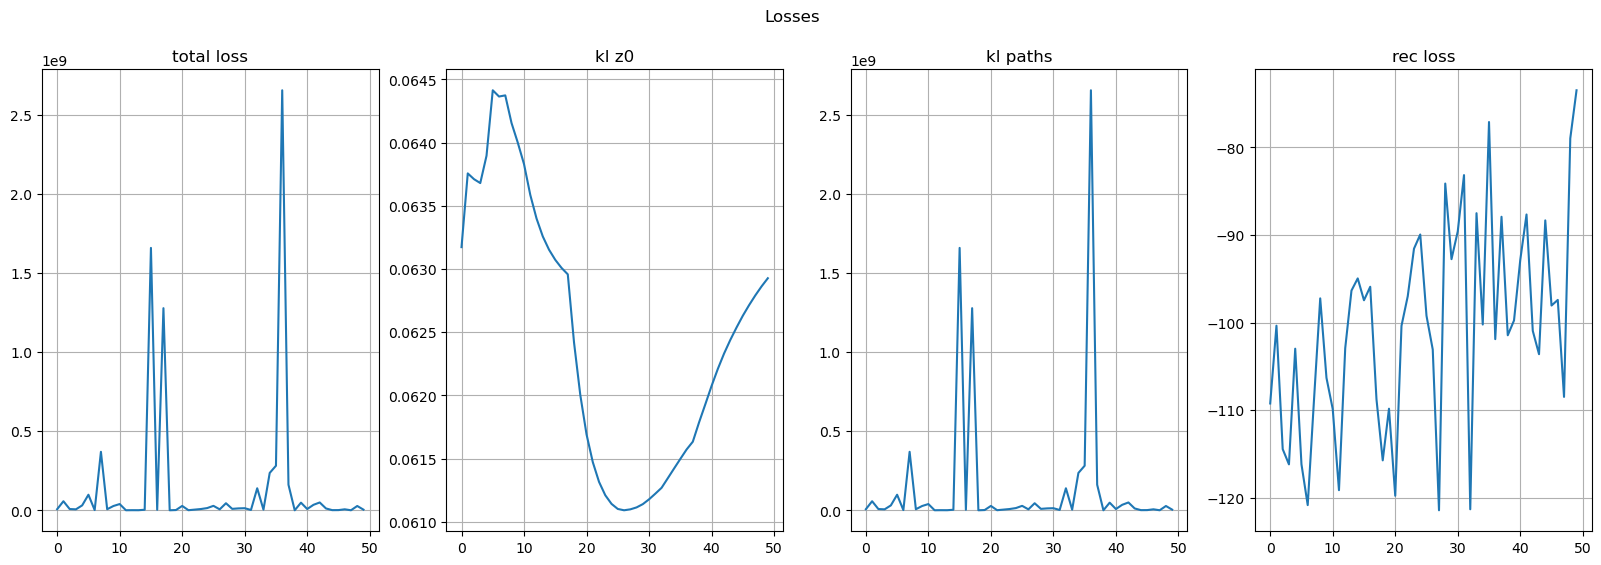

In [70]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20,6))

results={
    "total loss" : list_epoch_loss,
    "kl z0" : list_kl_z0s,
    "kl paths" : list_kl_sdes,
    "rec loss" : list_rec_loss
}

for i,(k,v) in enumerate(results.items()):
    ax[i].plot(v)
    ax[i].set_title(k)
    ax[i].grid(True)
    
fig.suptitle("Losses")
plt.show()

<div style="background-color: #008B8B; padding: 15px; border-radius: 5px; font-size: 28px; color: black; font-weight: bold;">
Reconstruction
</div>

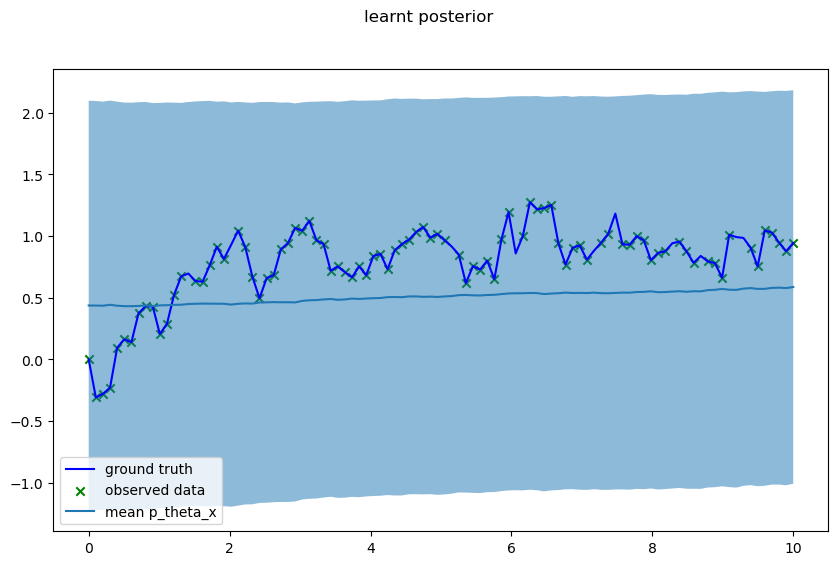

In [71]:
N_DISPLAY = 1  # we will reconstruct one path
K = 5 # number of samples to draw

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))

# get data
all_ts = times
all_xs = all_data[0]
obs_ts = observation_times[0]
obs_xs = sampled_data[0]

# plot ground truth
ax.plot(all_ts.detach().cpu(), all_xs.detach().cpu(), label='ground truth', color='blue')
ax.scatter(obs_ts.detach().cpu(), obs_xs.detach().cpu(), label='observed data', marker='x', color='green')

# compute posterior and recontruction estimates with what the model has learnt
with torch.no_grad():
    # encode into context
    model_sde.encode(obs_ts.unsqueeze(0), obs_xs.unsqueeze(0))
    # compute posterior initial value
    mean_z0_post, logvar_z0_post = encoder_start(model_sde.context)
    cov_z0_post = torch.diag_embed(torch.exp(logvar_z0_post)).to(device)
    q_phi_z0 = torch.distributions.MultivariateNormal(
        loc=mean_z0_post,
        covariance_matrix=cov_z0_post
    )
    z0s_post = q_phi_z0.rsample((K,)).to(device)  # (K,Dl)
    # compute posterior paths
    current_zs = torchsde.sdeint(model_sde, z0s_post[0,:,:], all_ts, method='euler', dt=1e-3, logqp=False) # (N,K,Dz)
    zs_post = current_zs.unsqueeze(0).detach()
    # print(zs_post.shape)
    # compute mean and logvar, instantiate decoder distribution
    mu_x, logvar_x = decoder(zs_post) # (B,N,K,Dx) ; (B,N,K,Dx)
    cov_x = torch.diag_embed(torch.exp(logvar_x)).to(device) # (B,N,K,Dx,Dx)
    p_theta_x = torch.distributions.MultivariateNormal(loc=mu_x, covariance_matrix=cov_x)
    
# plot the sampled distributions
# sample from decoder distribution
# sampled_xs = p_theta_x.rsample((K,)) # (K,B,L,1,Dx=1)
# for k in range(K):
#     ax.plot(all_ts.detach().cpu(), sampled_xs[k,0,:,0,0].detach().cpu(), label=f'sample {k+1}')

# plot the computed distribution : mean and variance
# plot mean
ax.plot(all_ts.detach().cpu(), mu_x[0,:,0,0].detach().cpu(), label=f'mean p_theta_x')
# plot variance
variances = cov_x[0,:,0,0,0]
ax.fill_between(
    all_ts.detach().cpu(), 
    mu_x[0,:,0,0].detach().cpu() - 2*torch.sqrt(variances.detach().cpu()),
    mu_x[0,:,0,0].detach().cpu() + 2*torch.sqrt(variances.detach().cpu()),
    alpha = 0.5
)
    
fig.suptitle('learnt posterior')
plt.legend()
plt.show()